# Dataset exploration

Import the packages

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, 'src/')

In [2]:
import data_splitting
import pandas as pd
import sys

import matplotlib.pyplot as plt
import numpy as np

try:
    from nltk import wordpunct_tokenize
    from nltk.corpus import stopwords
except ImportError:
    print '[!] You need to install nltk (http://nltk.org/index.html)'

load the dataset files

In [3]:
bf='dataset/train_bodies.csv'
sf='dataset/train_stances.csv'

bodies = pd.read_csv(bf)
stances = pd.read_csv(sf)

bs = data_splitting.import_data(bf,sf)

## Article bodies exploration

These functions predict the language of the body

In [4]:
# http://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/
def _calculate_languages_ratios(text):

    languages_ratios = {}

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]

    # Compute per language included in nltk number of unique stopwords appearing in analyzed text
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)

        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios


def detect_language(text):

    ratios = _calculate_languages_ratios(text)

    most_rated_language = max(ratios, key=ratios.get)

    return most_rated_language

In [5]:
bodies['language']=bodies.apply(lambda row: detect_language(row['articleBody']), axis=1)
bodies['wordCount']=bodies.apply(lambda row: len(row['articleBody'].split()), axis=1)
bodies['sentenceCount']=bodies.apply(lambda row: row['articleBody'].count('.')+row['articleBody'].count('?')+row['articleBody'].count('!'), axis=1)

/Users/richardgodden/envs/fnc-1/lib/python2.7/site-packages/ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


In [6]:
print 'total number of bodies: ', len(bodies)

total number of bodies:  1683


In [7]:
english = bodies.loc[bodies['language'] == 'english']
nonenglish = bodies.loc[bodies['language'] != 'english']
nonenglish

,Body ID,articleBody,language,wordCount,sentenceCount
413,624,您所访问的资源已不存在。\n查看更多请返回网站主页。\n» cctvnews.cn,swedish,4,1
594,891,A US airstrike allegedly killed ISIS leader Al...,spanish,8,1
1119,1686,L’inspecteur viral avoue que son petit coeur a...,french,430,45
1325,1989,ISIL beheaded British aid worker David Haines ...,french,12,1
1590,2391,VLADIMIR Putin’s Motorcade looks like a massiv...,hungarian,10,0
1670,2515,Et si Dieu était une femme? C'est ce qu'affirm...,french,263,16


### The non english bodies full text

In [8]:
print bodies.get_value(413,'articleBody')

您所访问的资源已不存在。
查看更多请返回网站主页。
» cctvnews.cn


In [9]:
print bodies.get_value(594,'articleBody')

A US airstrike allegedly killed ISIS leader Al-Baghdadi.


In [10]:
print bodies.get_value(1119,'articleBody')

L’inspecteur viral avoue que son petit coeur a sauté de joie pendant une micro seconde en voyant cette nouvelle.

Comme ont annoncé plusieurs médias (en prenant soin de mettre un point d’interrogation à la fin de leur titre, pour qu’on ne les accuse pas de propager des nouvelles-vidanges), le réalisateur de Star Wars epsiode VII, J. J. Abrams, aurait dit, au cours d’une cérémonie où il a reçu un prix de la part du Visual Effects Society (VES) le 4 février, qu’il souhaitait que Disney devance la sortie de son film à cet été.

Wow! Nous qui attendions avec impatience la date de lancement officielle, prévue pour le 18 décembre!!

Comme vous l’apprenait Métro récemment, les médias sautent souvent sur une nouvelle sans vérifier les informations de bases. Examinons:

1. Tous les articles offrent comme source les sites iKwiz et Moviepilot.

2. iKwiz est un site qui offre des quiz et du contenu léger sous forme de listes. Ce n’est pas un site de nouvelles.

3. Moviepilot base son reportage sur

In [11]:
print bodies.get_value(1325,'articleBody')

ISIL beheaded British aid worker David Haines as shown on released video.


In [15]:
print bodies.get_value(1590,'articleBody')

VLADIMIR Putin’s Motorcade looks like a massive knob:
Spotter: UsVThem


In [12]:
print bodies.get_value(1670,'articleBody')

Et si Dieu était une femme? C'est ce qu'affirme le père John Micheal O’neal, prêtre de 71 ans dans le Massachusetts. Le 29 janvier dernier, il est amené d’urgence à l’hôpital, victime d'une crise cardiaque. Quelques minutes après son arrivée, il est déclaré cliniquement mort. Les médecins parviennent finalement à le «ramener à la vie en redémarrant son cœur, 48 minutes après qu’il s’est arrêté, rapportent plusieurs médias américains.
Le religieux américain a prétendu avoir des souvenirs clairs de ce qui lui était arrivé pendant ces longues minutes de mort clinique. Il explique avoir eu la sensation d’être sorti de son corps, entouré par une lumière écrasante, et éprouvé un sentiment d’intense amour autour de lui. Des sensations souvent évoquées par ceux qui ont fait l’expérience de mort imminente (EMI).  
Dieu, une «figure maternelle chaleureuse et réconfortante»
Mais John Micheal O’neal va plus loin. Il affirme être monté au ciel et avoir rencontré le Tout-puissant. Celui-ci serait un

### word and sentence counts

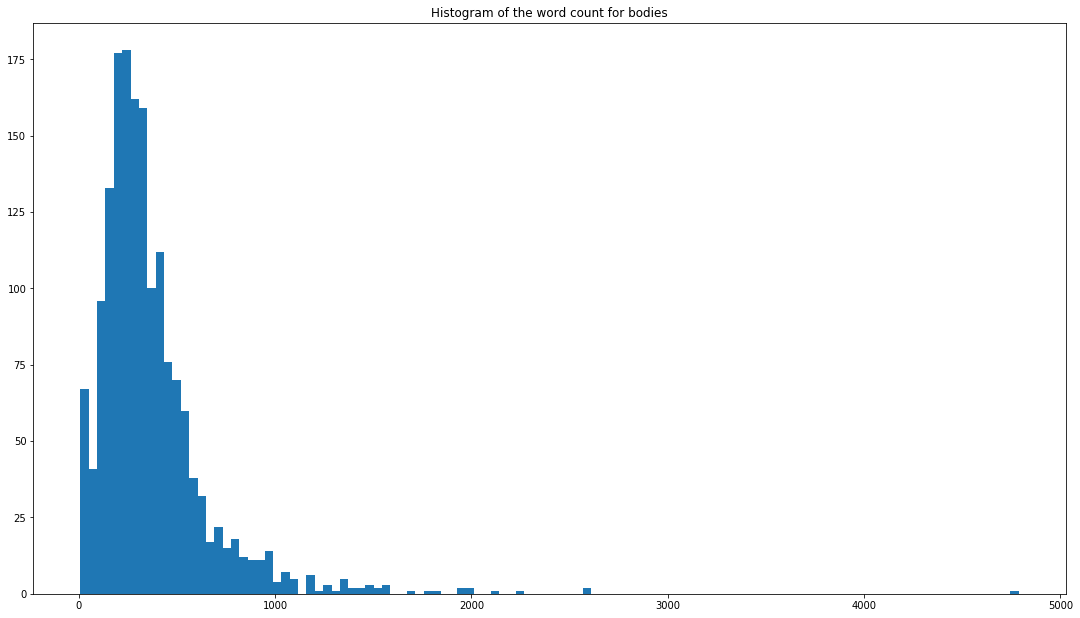

Min wordcount: 8
Median wordcount: 302.0
Max wordcount: 4788


In [13]:
plt.figure(figsize=(18.5, 10.5))
a = english['wordCount']  # deterministic random data
plt.hist(a.as_matrix(), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of the word count for bodies")
plt.show()
print'Min wordcount:', a.min()
print'Median wordcount:', a.median()
print'Max wordcount:', a.max()

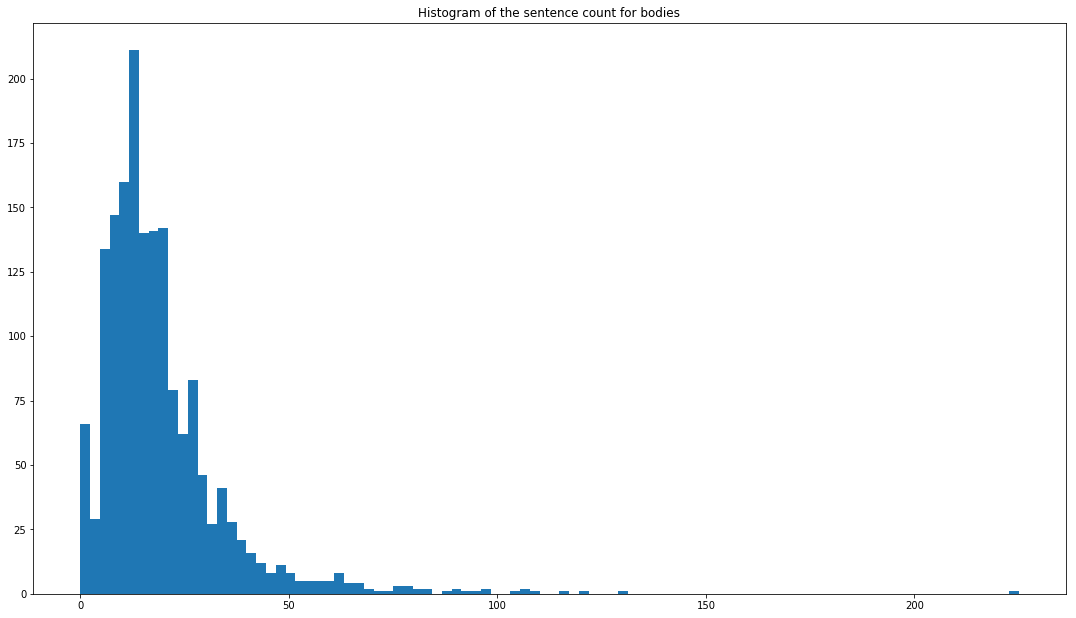

Min sentence count: 0
Median sentence count: 16.0
Max sentence count: 225


In [14]:
plt.figure(figsize=(18.5, 10.5))
a = english['sentenceCount']  # deterministic random data
plt.hist(a.as_matrix(), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of the sentence count for bodies")
plt.show()
print'Min sentence count:', a.min()
print'Median sentence count:', a.median()
print'Max sentence count:', a.max()

## Headline exploration

In [37]:
headlines = stances.drop(['Body ID', 'Stance'], axis=1)
headlines['freq'] = headlines.groupby('Headline')['Headline'].transform('count')
headlines = headlines.drop_duplicates(subset=['Headline'])

In [39]:
headlines['language']=headlines.apply(lambda row: detect_language(row['Headline']), axis=1)
headlines['wordCount']=headlines.apply(lambda row: len(row['Headline'].split()), axis=1)
headlines['sentenceCount']=headlines.apply(lambda row: row['Headline'].count('.')+row['Headline'].count('?')+row['Headline'].count('!'), axis=1)

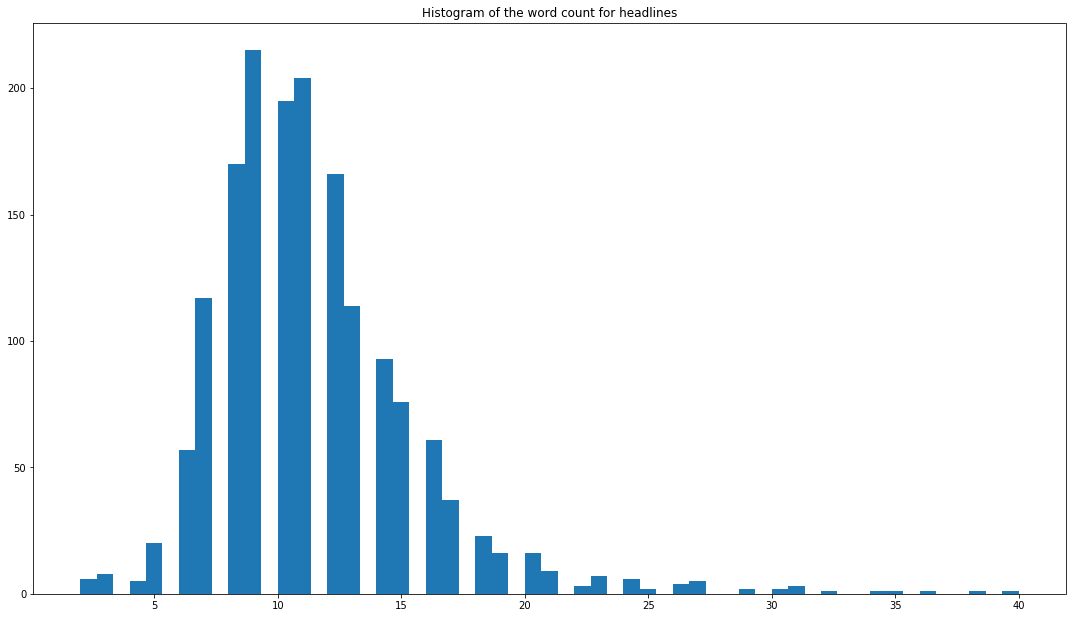

Min word count: 2
Median word count: 11.0
Max word count: 40


In [42]:
plt.figure(figsize=(18.5, 10.5))
a = headlines['wordCount']  # deterministic random data
plt.hist(a.as_matrix(), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of the word count for headlines")
plt.show()
print'Min word count:', a.min()
print'Median word count:', a.median()
print'Max word count:', a.max()

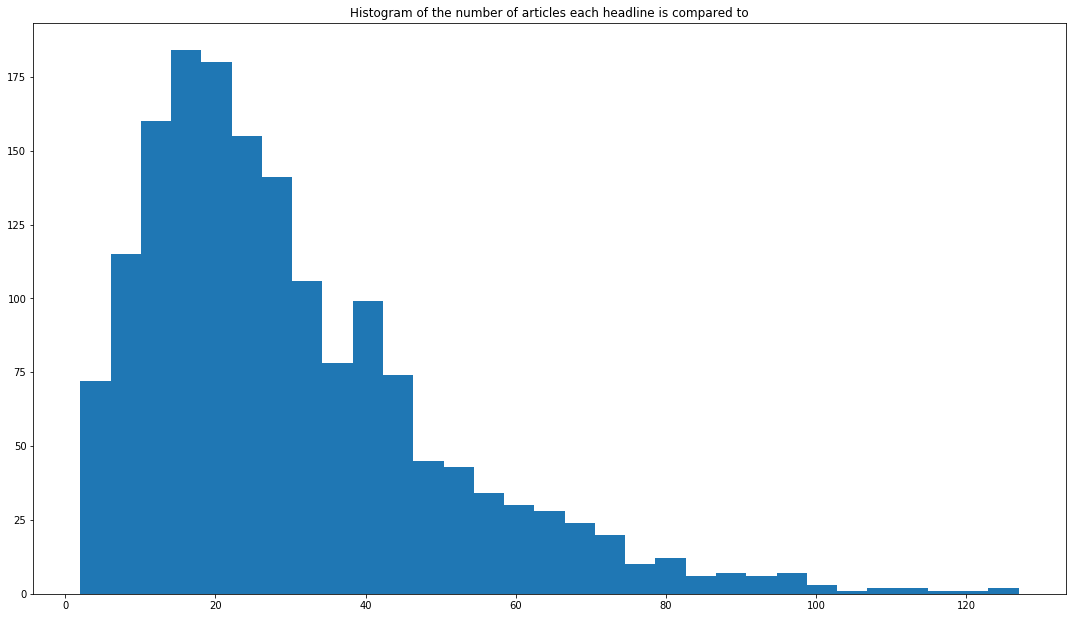

Min freq count: 2
Median freq count: 26.0
Max freq count: 127


In [44]:
plt.figure(figsize=(18.5, 10.5))
a = headlines['freq']  # deterministic random data
plt.hist(a.as_matrix(), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of the number of articles each headline is compared to")
plt.show()
print'Min freq count:', a.min()
print'Median freq count:', a.median()
print'Max freq count:', a.max()